In [1]:
import wandb
import numpy as np
import re
api = wandb.Api()
account_name="ai4quake"
#account_name="szztn951357"

In [2]:
project_name_list = [p.name for p in api.projects() if "TSL" in p.name and "Old" not in p.name]

In [3]:
job_maping={'96_48_96' :"096",
            '96_96_96' :"096",
            '96_48_192':"192",
            '96_96_192':"192",
            '96_48_336':"336",
            '96_96_336':"336",
            '96_48_720':"720",
            '96_96_720':"720"}

In [4]:
model_name_mapping={
    "TimesNet":"TimesNet",
    "Pyraformer":"Pyraformer",
    "MICN":"MICN",
    "Crossformer":"Crossformer",
    "Autoformer":"Autoformer",
    "Transformer":"Transformer",
    "PatchTST":"PatchTST",
    "Nonstationary_Transformer":"Stationary",
    "Reformer":"Reformer",
    "LightTS":"LightTS",
    "Informer":"Informer",
    "FEDformer":"FEDformer",
    "DLinear":"DLinear",
    "ETSformer":"ETSformer",
}

#### how many trail for each task

In [5]:
#rawdata = []
pool = {}
fail_trail = []
for name in project_name_list:
    if "ili" in name:continue
    if name not in pool:pool[name]={}
    runs = api.runs(path=f"{account_name}/{name}")
    for run in runs:
        #if run.name[:5] not in ['04_24','04_25','04_26','04_27','04_28','04_29','04_30']:continue
        model = run.group
        graph = run.config['compute_graph_set']
        #graph = run.config['pretrain_weight']
        if model not in pool[name]:pool[name][model] = {}
        if graph not in pool[name][model]: pool[name][model][graph]=[]
        pool[name][model][graph].append(run.name)

In [6]:
raw_data = []
for dataset,model_pool in pool.items():
    for model, graph_pool in model_pool.items():
        for graph, _list in graph_pool.items():
            raw_data.append([dataset, model, graph, len(_list)])

In [7]:
import pandas as pd
# Create raw data for the table

# Create a Pandas DataFrame from raw data
df = pd.DataFrame(raw_data, columns=['dataset', 'model', 'graph', 'num'])

df_pivot = df.pivot_table(index=['model', 'graph'], columns=['dataset'], values='num')


styled_df = df_pivot.style.format("{:.0f}").set_table_styles([
    {'selector': 'th', 'props': [('font-weight', 'bold'), ('text-align', 'center')]},
    {'selector': 'th.level0', 'props': [('border-bottom', '3px solid black')]},
    {'selector': 'th.level1', 'props': [('border-bottom', '2px solid black')]},
    {'selector': 'th.level2', 'props': [('border-bottom', '1px solid black')]},
    {'selector': 'td', 'props': [('text-align', 'center')]},
])

# Display the styled DataFrame in Jupyter Notebook
styled_df

In [10]:
# rawdata = []
# pool = {}
# for name in project_name_list:
#     if "ili" in name:continue
#     runs = api.runs(path=f"szztn951357/{name}")
#     for run in runs:
#         if run.state in ["finished","running"]:continue
#         if 'epoch' in run.summary and run.summary['epoch'] > 1:continue
#         if 'test_mse' in run.summary:continue
#         if 'learning rate' in run.summary:
#             run.delete()

In [51]:
# rawdata = []
# pool = {}
# for task_name in project_name_list:
#     runs = api.runs(path=f"szztn951357/{task_name}")
#     for run in runs:
#         model    = model_name_mapping[run.group]
#         job_type = run.job_type
#         if int(job_type.split("_")[-1])==96:continue
#         task     = task_name.replace('TSL-',"")
#         key      = task+job_type+model
#         name     = run.name
#         path     = run.config['SAVE_PATH']
#         if ('test_mse' not in run.summary and 
#             'longrange_prediction' not in run.history()):
#             print(f"{task_name}/runs/{run.id}")
#             run.delete()
        

In [5]:
# rawdata = []
# pool = {}
# for task_name in project_name_list:
#     runs = api.runs(path=f"szztn951357/{task_name}")
#     for run in runs:
#         model    = model_name_mapping[run.group]
#         job_type = run.job_type
#         if int(job_type.split("_")[-1])==96:continue
#         task     = task_name.replace('TSL-',"")
#         key      = task+job_type+model
#         name     = run.name
#         path     = run.config['SAVE_PATH']
#         if key not in pool:pool[key]={}
#         if name not in pool[key]:pool[key][name]={}
#         if 'test_mse' in run.summary:
#             mse = np.round(run.summary['test_mse'],4)
#             if 'mse' in pool[key][name] and pool[key][name]['mse']!=mse:
#                 print(f"the mse different for trail {name} in {key}, which is {pool[key][name]['mse']} and {mse} ")
#             pool[key][name]['mse'] = mse
#         if 'id_list' not in pool[key][name]:pool[key][name]['id_list']=[]
#         pool[key][name]['id_list'].append(run)
#         if 'right_longrange' not in pool[key][name]:pool[key][name]['right_longrange']=0
#         if 'future' in run.summary and 'longrange_prediction' in run.summary:
#             pool[key][name]['right_longrange']=1
#         pool[key][name]['SAVE_PATH'] = run.config['SAVE_PATH']
        

In [14]:
# import os
# tlist = []
# for key,val in pool.items():
#     if len(val)>1:
#         sorted_dict = sorted(val.items())
#         DIR = os.path.join("TSLFourcast",os.path.dirname(sorted_dict[0][1]['SAVE_PATH'])[2:])
#         if not os.path.exists(DIR):
#             print(f"not exist => {DIR}")
#             continue
#         if len(os.listdir(DIR))<2:
#             print(f"too small {DIR}")



# trail_list=[]
# for key,val in pool.items():
#     if len(val)>1:
#         sorted_dict = sorted(val.items())
#         DIR = os.path.join("TSLFourcast",os.path.dirname(sorted_dict[0][1]['SAVE_PATH'])[2:])
#         if not os.path.exists(DIR):
#             print(f"not exist => {DIR}")
#             continue
# #         if len(os.listdir(DIR))<2:
# #             #print(f"too small {DIR}")
# #             continue
#         for d in sorted_dict[:-1]:
#             for run in d[1]['id_list']:
#                 run.config['redundancy_flag']=1
#                 run.update()
#             #print(f"{d[1]['id_list'][0]} {d[1]['SAVE_PATH']}")
# #         trail_list.append(d[1]['SAVE_PATH'])

# import shutil

# for path in trail_list:
#     abs_path = os.path.join("TSLFourcast",path[2:])
#     tgt_path = abs_path.replace("checkpoints","checkpoints-redundancy")
#     shutil.move(abs_path, tgt_path)

#### T+1 plot

In [31]:
rawdata = []
pool = {}
for name in project_name_list:
    if "ili" in name:continue
    runs = api.runs(path=f"szztn951357/{name}")
    for run in runs:
        #if run.state not in ["finished"]:continue
        #if 'epoch' in run.summary and run.summary['epoch'] > 1:continue
        if 'test_mse' in run.summary:
            if 'time_step' in run.config and run.config['time_step']>2:continue
            if 'ft' not in run.job_type:continue 
            mse = run.summary['test_mse']
            model = model_name_mapping[run.group]
            job_type = job_maping[run.job_type.split('.')[-1]]
            task = name.replace('TSL-',"")
            key = task+job_type+model
            if key in pool:
                continue
            pool[key] = mse
            rawdata.append([task,job_type,model,mse])

In [15]:
import pandas as pd
# Create raw data for the table

# Create a Pandas DataFrame from raw data
df = pd.DataFrame(rawdata, columns=['level', 'job', 'model', 'data'])

# Set 'level', 'index', and 'model' columns as MultiIndex
df = df.set_index(['level', 'job', 'model'])

# Pivot the DataFrame
df = df.unstack(level=-1)

# Rearrange column order
df = df[['data']]

# Remove 'data' level from the column index
df.columns = df.columns.droplevel()
# Apply custom styles to the DataFrame

def highlight_min(s):
    is_min = s == np.nanmin(s)
    return ['color: red' if v else '' for v in is_min]
def highlight_second_smallest(row):
    second_smallest = np.partition(row.values, 1)[1]
    return ['color:  blue' if x == second_smallest else '' for x in row]

styled_df = df.style.apply(highlight_min,axis=1).apply(highlight_second_smallest,axis=1).format("{:.3f}").set_table_styles([
    {'selector': 'th', 'props': [('font-weight', 'bold'), ('text-align', 'center')]},
    {'selector': 'th.level0', 'props': [('border-bottom', '3px solid black')]},
    {'selector': 'th.level1', 'props': [('border-bottom', '2px solid black')]},
    {'selector': 'th.level2', 'props': [('border-bottom', '1px solid black')]},
    {'selector': 'td', 'props': [('text-align', 'center')]},
])

# Display the styled DataFrame in Jupyter Notebook
styled_df

#### T+2 plot

In [72]:
#rawdata = []
pool = {}
error_name = "test_error_336"

for name in project_name_list:
    if "ili" in name:continue
    if "ECL" in name:continue
    if "traffic" in name:continue
    runs = api.runs(path=f"szztn951357/{name}")
    for run in runs:
        #if run.state not in ["finished"]:continue
        #if 'epoch' in run.summary and run.summary['epoch'] > 1:continue
        if 'time_step' in run.config and run.config['time_step'] == 3:

            model = model_name_mapping[run.group]
            job_type = job_maping[run.job_type.split('.')[-1]]
            task = name.replace('TSL-',"")
            
            graph = run.config['compute_graph_set'].split('_')[-1]
            
            for error_name in ["test_error_96","test_error_192","test_error_336","test_error_720"]:
                losses = [row[error_name] for row in run.scan_history() if error_name in row ]
                if len(losses)<=1:
                    #run.delete()
                    print(f"{task}-{model}-{graph}-{run.id}")
                    continue
                losses = [l for l in losses if isinstance(l,float)]
                job_type = error_name.split("_")[-1]
                key = f"{task}={job_type}={model}"
                if key not in pool:pool[key] = []
                pool[key].append([graph,min(losses)])   
            #rawdata.append([task,job_type,model,mse])

In [ ]:
rawdata = []
for key, value in pool.items():
    task,job_type,model = key.split("=")
    val =sorted(value,key=lambda x:x[1])[0]
    val = f"{val[0][0]}:{val[1]:.3f}"
    rawdata.append([task,job_type,model,val])

In [ ]:
import pandas as pd
# Create raw data for the table

# Create a Pandas DataFrame from raw data
df = pd.DataFrame(rawdata, columns=['level', 'job', 'model', 'data'])

# Set 'level', 'index', and 'model' columns as MultiIndex
df = df.set_index(['level', 'job', 'model'])

# Pivot the DataFrame
df = df.unstack(level=-1)

# Rearrange column order
df = df[['data']]

# Remove 'data' level from the column index
df.columns = df.columns.droplevel()
# Apply custom styles to the DataFrame
def highlight_r(cell):
    if 'R' in cell:
        return 'color: red'
    elif 'D' in cell:
        return 'color: blue'
    elif 'K' in cell:
        return 'color: green'
    elif 'M' in cell:
        return 'color: green'
    else:
        return ''


def highlight_min(ss):
    s = np.array([float(num.split(":")[-1]) for num in ss])
    is_min = s == np.nanmin(s)
    return ['background-color: lightblue' if v else '' for v in is_min]
    

styled_df = df.style.applymap(highlight_r).apply(highlight_min, axis=1).set_table_styles([
    {'selector': 'th', 'props': [('font-weight', 'bold'), ('text-align', 'center')]},
    {'selector': 'th.level0', 'props': [('border-bottom', '3px solid black')]},
    {'selector': 'th.level1', 'props': [('border-bottom', '2px solid black')]},
    {'selector': 'th.level2', 'props': [('border-bottom', '1px solid black')]},
    {'selector': 'td', 'props': [('text-align', 'center')]},
])

# Display the styled DataFrame in Jupyter Notebook
styled_df

In [57]:
# #run = api.run(path=f"szztn951357/TSL-ETTh1/runs/1p05wc4c")
# run = api.run(path=f"szztn951357/TSL-ETTh1/runs/6i5kt7ub")
# history = run.scan_history()
# losses = [row[error_name] for row in history if error_name in row ]

#### monitor alpha

###### get list 

In [8]:

path_pool = {}
#for name in project_name_list:
for name in ['TSL-ETTm2']:
    if "ili" in name:continue
    if "ECL" in name:continue
    #if "traffic" in name:continue
    runs = api.runs(path=f"szztn951357/{name}")
    for run in runs:
        if not ('time_step' not in run.config or run.config['time_step'] == 2 or 
                (run.config['time_step'] == 3 and run.config['compute_graph_set'].split('_')[-1] in ['D','Rog5'])
               ):continue
        #if run.group not in ['Crossformer','DLinear','LightTS','MICN','PatchTST','TimesNet']:continue
        if 'test_mse' not in run.summary:continue
        #if '96' not in job_type:continue
        if 'compute_graph_set' not in run.config or run.config['compute_graph_set'] is None:
            graph = 'fwd1_D'
        else:
            graph = run.config['compute_graph_set']
        mse      = run.summary['test_mse']
        model    = model_name_mapping[run.group]
        job_type = run.job_type.split("_")[-1]
        if job_type!='96':continue
        task     = name.replace('TSL-',"")
        key = f"{task}={job_type}={model}={graph}"
        if key not in path_pool:path_pool[key] = []
        path_pool[key].append(run.config['SAVE_PATH'])   

In [9]:
import os
for key, path_list in path_pool.items():
    #print(key)
    for p in path_list:
        if 'checkpoint.pth' in os.listdir(p):
            print(p)
            break

###### generate data

In [ ]:
model_list   = ['Crossformer', 'DLinear', 'LightTS','MICN','PatchTST','TimesNet']

In [59]:
path_pool = {}
for name in project_name_list:
    if "ili" in name:continue
    if "ECL" in name:continue
    #if "traffic" in name:continue
    runs = api.runs(path=f"szztn951357/{name}")
    for run in runs:
        
        if 'compute_graph_set' not in run.config or run.config['compute_graph_set'] is None:
            graph = 'fwd1_D'
        else:
            graph = run.config['compute_graph_set']
        if graph not in ['fwd1_D','fwd2_D_Rog5','fwd2_D']:continue
        model    = model_name_mapping[run.group]
        if model not in model_list:continue
        job_type = run.job_type.split("_")[-1]
        if job_type!='96':continue
        task     = name.replace('TSL-',"")
        key = f"{task}={job_type}={model}={graph}"
        #if key not in path_pool:path_pool[key] = []
        if ("alpha_monitor_for_test" not in run.summary) and ("alpha_monitor_for_test" not in run.history()) :
            if run.config['time_step']==3:
                key_list = ["test_error_96"]
                if not np.any([k in run.summary for k in key_list ]): continue
                for error_name in key_list:
                    losses = [row[error_name] for row in run.scan_history() if error_name in row ]
                    if len(losses)<=1:
                        continue
                    losses = [l for l in losses if isinstance(l,float)]
                    if key not in path_pool:path_pool[key] = {}
                    path_pool[key]['loss'] = min(losses)
            else:
                if 'test_mse' not in run.summary:continue
                if key not in path_pool:path_pool[key] = {}
                path_pool[key]['loss'] = run.summary['test_mse']
        else:
            if key not in path_pool:path_pool[key] = {}
            path_pool[key]['alpha']=[row["alpha_monitor_for_test"] for row in run.scan_history() if "alpha_monitor_for_test" in row ]
            

In [60]:
real_pool = {}
for key,val in path_pool.items():
    task, _, model, graph = key.split('=')
    if task not in real_pool:real_pool[task]={}
    if model not in real_pool[task]:real_pool[task][model]={}
    real_pool[task][model][graph] = val

In [79]:
# with open('figures/full_TS_alpha.json','w') as f:
#     json.dump(real_pool,f)

In [47]:
from mltool.visualization import *

In [97]:
best_case =["weather-LightTS","Exchange-MICN","ETTm2-PatchTST","ETTm1-PatchTST","ETTh2-TimesNet","ETTh1-PatchTST"]

In [106]:
# %matplotlib inline
# import scienceplots
# with plt.style.context(['science', 'no-latex', 'ieee']):
#     colormap = {'fwd1_D':'black','fwd2_D_Rog5':'red','fwd2_D':'blue'}
#     labelmap = {'fwd1_D':'A','fwd2_D_Rog5':'JK','fwd2_D':'AB'}
#     fig,axes = plt.subplots(6,6,figsize=(21,18))
#     fig.subplots_adjust(left=0, right=1, bottom=0.1, top=0.95, wspace=0.2, hspace=0.2)
#     dataset_list = ['ETTh1','ETTh2','ETTm1','ETTm2','Exchange','weather']
#     model_list   = ['Crossformer', 'DLinear', 'LightTS','MICN','PatchTST','TimesNet']
#     for i, ax in enumerate(axes[:, 0]):
#         ax.set_ylabel(dataset_list[i], rotation=90, labelpad=20, fontsize=20)
#     for j, ax in enumerate(axes[-1]):
#         ax.set_xlabel(model_list[j], fontsize=20)

#     for dataset in dataset_list:
#         model_pool = real_pool[dataset]
#         ax_i = dataset_list.index(dataset)
#         for model in model_list:
#             graph_pool=model_pool[model]
#             ax_j = model_list.index(model)
#             ax   = axes[ax_i][ax_j]
#             for graph, val in graph_pool.items():
#                 #print(graph)
#                 kargs = {'color':colormap[graph]}
#                 if ax_i == ax_j ==0:
#                     kargs['label'] = labelmap[graph]
#                 alpha= val['alpha']
#                 ml = pool_table[dataset]["720"][model]
#                 #print(f"{dataset}={model}=720: A:{ml['A']} R:{ml['R']} ")
#                 if ml['R'] <= ml['A']:
#                     for pos in ['bottom','left','right','top']:
#                         ax.spines[pos].set_color('black')
#                         ax.spines[pos].set_linewidth(2)
#                 else:
#                     for pos in ['bottom','left','right','top']:
#                         ax.spines[pos].set_color('blue')
#                         ax.spines[pos].set_linewidth(2)
#                 if f"{dataset}-{model}" in best_case:
#                     for pos in ['bottom','left','right','top']:
#                         ax.spines[pos].set_linewidth(5)
# #                 if ml['R'] <= min(ml.values()):
# #                     for pos in ['bottom','left','right','top']:
# #                         ax.spines[pos].set_linewidth(5)
# #                 if ml['A'] <= min(ml.values()):
# #                     for pos in ['bottom','left','right','top']:
# #                         ax.spines[pos].set_linewidth(5)
#                 #if 'loss' not in val:
#                 #    print(f"{dataset}-{model}-{graph}")
#                 #    pass
#                 #else:
#                 #    loss = val['loss']
#                 #    kargs['label'] = f"{labelmap[graph]}:{loss:.3f}"
#                 #ax.legend()
#                 ax.plot(alpha,lw=3,**kargs)
#                 if dataset == 'Exchange':
#                     ax.set_xticks([0,4,8,12])
#                 else:
#                     ax.set_xticks([0,5,10,15,20])
#                 ax.tick_params(axis='both', labelsize=14)
                
#     fig.legend(loc='lower center', ncol=6,prop={'size': 20})
#     fig.suptitle('Amplifier Monitor', fontsize=30)
#     fig.savefig("figures/estimate_the_alpha_for_all_dataset.png", dpi=300)

In [104]:
fig.savefig("figures/estimate_the_alpha_for_all_dataset.png", dpi=300, bbox_inches='tight')

#### Compare T+1 and T+2

In [8]:
from tqdm.auto import tqdm

#rawdata = []
pool = {}
error_name = "test_error_336"

for name in tqdm(project_name_list):
    if "ili" in name:continue
    if "ECL" in name:continue
    #if "traffic" in name:continue
    runs = api.runs(path=f"{account_name}/{name}")
    for run in tqdm(runs):
        #if run.state not in ["finished"]:continue
        #if 'epoch' in run.summary and run.summary['epoch'] > 1:continue
        if 'time_step' in run.config and run.config['time_step'] == 3:
            model = model_name_mapping[run.group]
            job_type = job_maping[run.job_type.split('.')[-1]]
            task = name.replace('TSL-',"")
            graph = run.config['compute_graph_set'].split('_')[-1]
            for error_name in ["test_error_96","test_error_192","test_error_336","test_error_720"]:
                losses = [row[error_name] for row in run.scan_history() if error_name in row ]
                if len(losses)<=1:
                    #if len(losses)==1:run.delete()
                    #print(f"{task}-{model}-{graph}-{run.id}")
                    continue
                losses = [l for l in losses if isinstance(l,float)]
                job_type = error_name.split("_")[-1]
                key = f"{task}={job_type}={model}"
                if key not in pool:pool[key] = []
                pool[key].append([graph,min(losses)])  
            
            #rawdata.append([task,job_type,model,mse])

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

  0%|          | 0/59 [00:00<?, ?it/s]

  0%|          | 0/35 [00:00<?, ?it/s]

  0%|          | 0/66 [00:00<?, ?it/s]

In [12]:
#rawdata = []
pool2 = {}
error_name = "test_mse"

for name in project_name_list:
    if "ili" in name:continue
    if "ECL" in name:continue
    #if "traffic" in name:continue
    runs = api.runs(path=f"szztn951357/{name}")
    for run in runs:
        #if run.state not in ["finished"]:continue
        #if 'epoch' in run.summary and run.summary['epoch'] > 1:continue
        if not ('time_step' in run.config and run.config['time_step'] == 2):continue
        if 'test_mse' not in run.summary:continue
            
        mse      = run.summary['test_mse']
        model    = model_name_mapping[run.group]
        job_type = run.job_type.split("_")[-1]
        task     = name.replace('TSL-',"")
        
        key = f"{task}={job_type}={model}"
        if key not in pool2:pool2[key] = []
        pool2[key].append(["A",mse])   
        #rawdata.append([task,job_type,model,mse])

In [9]:
rawdata = []

for key, value in pool.items():
    task,job_type,model = key.split("=")
    if "ETSformer" in model: continue
    if "FEDformer" in model: continue    
    #if "Exchange" in task: continue
    value = sorted(value,key=lambda x:x[1])
    repeat={}
    for name, val in value:
        if name not in repeat:repeat[name]=[]
        repeat[name].append(val)
    if len(job_type)<3:job_type="0"+job_type
    for name, val in repeat.items():
        top10 = np.sort(val)[:10]
        rawdata.append([task,job_type,model,name[0],min(val),max(val),np.mean(val),np.std(val),np.mean(top10),np.std(top10)])

for key, value in pool2.items():
    task,job_type,model = key.split("=")
    if "ETSformer" in model: continue
    if "FEDformer" in model: continue    
    #if "Exchange" in task: continue
    if len(job_type)<3:job_type="0"+job_type
    value = sorted(value,key=lambda x:x[1])
    repeat={}
    for name, val in value:
        if name not in repeat:repeat[name]=[]
        repeat[name].append(val)
    for name, val in repeat.items():
        top10 = np.sort(val)[:10]
        rawdata.append([task,job_type,model,name[0],min(val),max(val),np.mean(val),np.std(val),np.mean(top10),np.std(top10)])

In [12]:
pool_table = {}
for task,length,model, rank, min_error, max_error, mean_error,std_error,top10,std10 in rawdata:
    if task not in pool_table:pool_table[task]={}
    if length not in pool_table[task]:pool_table[task][length]={}
    if model not in pool_table[task][length]:pool_table[task][length ][model]={}
    if rank not in pool_table[task][length ][model]:
        pool_table[task][length ][model][rank]=[min_error, max_error, mean_error,std_error,top10,std10]
    else:
        print(f'repeat at {task}={lenght}={model}={rank}')


import json
# with open('figures/full_TS_table.json','w') as f:
#     json.dump(pool_table,f)
# with open('figures/full_TS_table.json','r') as f:
#     pool_table = json.load(f)

In [11]:
## mean
import pandas as pd
global count_red 
global count_blue
global count_right
count_red  = 0
count_blue = 0
count_right= 0 



df = pd.DataFrame(rawdata, columns=['dataset', 'pred', 'model', 'metric', 'min_error','max_error','mean_error','std_error','top10_mean','std10'])

df = df[df['dataset']!='traffic']
#df = df.loc[df['model'].isin(['Crossformer', 'DLinear','LightTS','MICN','PatchTST','TimesNet'])]
df_pivot = df.pivot_table(index=['dataset', 'pred'], columns=['model', 'metric'], values='top10_mean')

def apply_border_style(val):
    out = []
    for v in val.index:
        if   v[1] == 'A':out.append('border-left: 2px solid black')
        elif v[1] == 'A':out.append('border-right: 2px solid black')
        else:out.append('')
    return out

def apply_compare(val):
    global count_red 
    global count_blue
    global count_right
    length = len(val)
    assert length%3 == 0
    out = []
    for A,D,R in np.split(val,length//3):
        out.append('')
        if D < A:
            out.append('color: red')
            count_red+=1
        else:
            out.append('color: blue')
            count_blue+=1
        if R < A:
            out.append('color: red')
            count_red+=1
        else:
            out.append('color: blue')
            count_blue+=1
        if R <= D:
            count_right+=1
    return out

def apply_under_line_best_inblock(val):
    
    length = len(val)
    assert length%3 == 0
    out = []
    for A,D,R in np.split(val,length//3):
        min_index = np.argmin([A,D,R])
        temp = ["","",""]
        temp[min_index] = 'border-bottom: 3px solid black'
        out.extend(temp)
    return out

def highlight_min(s):
    is_min = s == np.nanmin(s)
    return ['background-color: lightblue' if v else '' for v in is_min]
styled_df = df_pivot.style.format("{:.4f}").apply(highlight_min,axis=1).apply(apply_under_line_best_inblock,axis=1).apply(apply_compare,axis=1).apply(apply_border_style,axis=1).set_table_styles([
    {'selector': 'th', 'props': [('font-weight', 'bold'), ('text-align', 'center')]},
    {'selector': 'th.level0', 'props': [('border-bottom', '3px solid black')]},
    {'selector': 'th.level1', 'props': [('border-bottom', '2px solid black')]},
    {'selector': 'th.col_heading', 'props': [('border-right', '2px solid black')]},
    {'selector': 'td', 'props': [('text-align', 'center')]},
    {'selector': 'td.col_heading.level0', 'props': [('border-left', '2px solid black')]},
    {'selector': 'td.row_heading.level1', 'props': [('border-left', '2px solid black')]},
])

styled_df


In [78]:
## mean
import pandas as pd
df = pd.DataFrame(rawdata, columns=['dataset', 'pred', 'model', 'metric', 'min_error','max_error','mean_error','std_error','top10_mean','std10'])
df = df[df['dataset']!='traffic']
df = df[df['metric']!='A']
df_pivot = df.pivot_table(index=['dataset', 'pred'], columns=['model', 'metric'], values='std10')
styled_df = df_pivot.style.format("{:.0e}").set_table_styles([
    {'selector': 'th', 'props': [('font-weight', 'bold'), ('text-align', 'center')]},
    {'selector': 'th.level0', 'props': [('border-bottom', '3px solid black')]},
    {'selector': 'th.level1', 'props': [('border-bottom', '2px solid black')]},
    {'selector': 'th.col_heading', 'props': [('border-right', '2px solid black')]},
    {'selector': 'td', 'props': [('text-align', 'center')]},
    {'selector': 'td.col_heading.level0', 'props': [('border-left', '2px solid black')]},
    {'selector': 'td.row_heading.level1', 'props': [('border-left', '2px solid black')]},
])

styled_df


In [79]:
with open('styled_table_all_std.html', 'w') as f:
    f.write(styled_df.render())

/tmp/ipykernel_41406/321154006.py:2: FutureWarning: this method is deprecated in favour of `Styler.to_html()`
  f.write(styled_df.render())


In [48]:
#### 竖版
import pandas as pd
global count_red 
global count_blue
global count_right
count_red  = 0
count_blue = 0
count_right= 0 
df = pd.DataFrame(rawdata, columns=['dataset', 'pred', 'model', 'metric', 'min_error','max_error','mean_error','std_error','top5_mean'])

df_pivot = df.pivot_table(index=['model', 'metric'], columns=['dataset', 'pred'], values='top5_mean')

def apply_border_style(val):
    out = []
    for v in val.index:
        if   v[1] == 'A':out.append('border-left: 2px solid black')
        elif v[1] == 'A':out.append('border-right: 2px solid black')
        else:out.append('')
    return out

def apply_compare(val):
    global count_red 
    global count_blue
    global count_right
    length = len(val)
    assert length%3 == 0
    out = []
    for A,D,R in np.split(val,length//3):
        out.append('')
        if D < A:
            out.append('color: red')
            count_red+=1
        else:
            out.append('color: blue')
            count_blue+=1
        if R < A:
            out.append('color: red')
            count_red+=1
        else:
            out.append('color: blue')
            count_blue+=1
        if R <= D:
            count_right+=1
    return out

def apply_under_line_best_inblock(val):
    
    length = len(val)
    assert length%3 == 0
    out = []
    for A,D,R in np.split(val,length//3):
        min_index = np.argmin([A,D,R])
        temp = ["","",""]
        temp[min_index] = 'border-bottom: 3px solid black'
        out.extend(temp)
    return out

def highlight_min(s):
    is_min = s == np.nanmin(s)
    return ['background-color: lightblue' if v else '' for v in is_min]
styled_df = df_pivot.style.format("{:.3f}").apply(apply_under_line_best_inblock,axis=0).apply(highlight_min,axis=0).apply(apply_compare,axis=0).set_table_styles([
    {'selector': 'th', 'props': [('font-weight', 'bold'), ('text-align', 'center')]},
    {'selector': 'th.level0', 'props': [('border-bottom', '3px solid black')]},
    {'selector': 'th.level1', 'props': [('border-bottom', '2px solid black')]},
    {'selector': 'th.col_heading', 'props': [('border-right', '2px solid black')]},
    {'selector': 'td', 'props': [('text-align', 'center')]},
    {'selector': 'td.col_heading.level0', 'props': [('border-left', '2px solid black')]},
    {'selector': 'td.row_heading.level1', 'props': [('border-left', '2px solid black')]},
])

styled_df


In [47]:
### old 竖版
# import pandas as pd
# global count_red 
# global count_blue
# global count_right
# count_red  = 0
# count_blue = 0
# count_right= 0 
# df = pd.DataFrame(rawdata, columns=['dataset', 'pred', 'model', 'metric', 'error'])

# #df = df[df['dataset']!='traffic']

# # df = df[df['pred']!="096"]
# # df = df[df['pred']!="192"]
# df_pivot = df.pivot_table(index=['model', 'metric'], columns=['dataset', 'pred'], values='error')

# def apply_border_style(val):
#     out = []
#     for v in val.index:
#         if   v[1] == 'A':out.append('border-left: 2px solid black')
#         elif v[1] == 'A':out.append('border-right: 2px solid black')
#         else:out.append('')
#     return out

# def apply_compare(val):
#     global count_red 
#     global count_blue
#     global count_right
#     length = len(val)
#     assert length%3 == 0
#     out = []
#     for A,D,R in np.split(val,length//3):
#         out.append('')
#         if D < A:
#             out.append('color: red')
#             count_red+=1
#         else:
#             out.append('color: blue')
#             count_blue+=1
#         if R < A:
#             out.append('color: red')
#             count_red+=1
#         else:
#             out.append('color: blue')
#             count_blue+=1
#         if R <= D:
#             count_right+=1
#     return out

# def apply_under_line_best_inblock(val):
    
#     length = len(val)
#     assert length%3 == 0
#     out = []
#     for A,D,R in np.split(val,length//3):
#         min_index = np.argmin([A,D,R])
#         temp = ["","",""]
#         temp[min_index] = 'border-bottom: 3px solid black'
#         out.extend(temp)
#     return out

# def highlight_min(s):
#     is_min = s == np.nanmin(s)
#     return ['background-color: lightblue' if v else '' for v in is_min]
# styled_df = df_pivot.style.format("{:.3f}").apply(apply_under_line_best_inblock,axis=0).apply(highlight_min,axis=0).apply(apply_compare,axis=0).set_table_styles([
#     {'selector': 'th', 'props': [('font-weight', 'bold'), ('text-align', 'center')]},
#     {'selector': 'th.level0', 'props': [('border-bottom', '3px solid black')]},
#     {'selector': 'th.level1', 'props': [('border-bottom', '2px solid black')]},
#     {'selector': 'th.col_heading', 'props': [('border-right', '2px solid black')]},
#     {'selector': 'td', 'props': [('text-align', 'center')]},
#     {'selector': 'td.col_heading.level0', 'props': [('border-left', '2px solid black')]},
#     {'selector': 'td.row_heading.level1', 'props': [('border-left', '2px solid black')]},
# ])

# styled_df


In [145]:
print(count_red/(count_blue+count_red))
print(2*count_right/(count_blue+count_red))

0.7847222222222222
0.8263888888888888


In [53]:
count_blue+count_red

576

In [68]:
print(count_red/(count_blue+count_red))
print(2*count_right/(count_blue+count_red))

0.8194444444444444
0.7638888888888888


In [50]:
count_blue+count_red

144

In [42]:
count_blue

36

In [70]:
with open('styled_table_traffic.html', 'w') as f:
    f.write(styled_df.render())

/tmp/ipykernel_9210/3635779395.py:2: FutureWarning: this method is deprecated in favour of `Styler.to_html()`
  f.write(styled_df.render())


In [ ]:
#rawdata = []
pool3 = {}
error_name = "test_mse"

for name in project_name_list:
    if "ili" in name:continue
    if "ECL" in name:continue
    #if "traffic" in name:continue
    runs = api.runs(path=f"szztn951357/{name}")
    for run in runs:
        #if run.state not in ["finished"]:continue
        #if 'epoch' in run.summary and run.summary['epoch'] > 1:continue
        if not ('time_step' in run.config and run.config['time_step'] == 2):continue
        if 'test_mse' not in run.summary:continue
        job_type = run.job_type.split("_")[-1]
        if job_type != '96':continue
        mse      = run.summary['test_mse']
        model    = model_name_mapping[run.group]
        task     = name.replace('TSL-',"")
        key = f"{task}={job_type}={model}"
        if task not in pool3:pool3[task] = {}
        if model not in pool3:pool3[task][model] = []
        pool3[task][model].append(run.config)   
        #rawdata.append([task,job_type,model,mse])

In [129]:
rawdata = []

for dataset, dataset_pool in pool3.items():
    for model, config_list in dataset_pool.items():
        if "ETSformer" in model: continue
        if "FEDformer" in model: continue    
        c = config_list[0]
        rawdata.append([dataset,model,c['batch_size']])


In [133]:
df = pd.DataFrame(rawdata, columns=['dataset', 'model', 'batchsize'])
df_pivot = df.pivot_table(index=['model'], columns=['dataset'], values='batchsize')
print(df_pivot.to_latex())

\begin{tabular}{lrrrrrrr}
\toprule
dataset &  ETTh1 &  ETTh2 &  ETTm1 &  ETTm2 &  Exchange &  traffic &  weather \\
model       &        &        &        &        &           &          &          \\
\midrule
Autoformer  &     32 &     32 &     32 &     32 &        32 &       32 &       32 \\
Crossformer &     32 &     32 &     32 &     32 &        32 &       16 &       32 \\
DLinear     &     32 &     32 &     32 &     32 &        32 &       32 &       32 \\
Informer    &     32 &     32 &     32 &     32 &        32 &       32 &       32 \\
LightTS     &     32 &     32 &     32 &     32 &        32 &       32 &       32 \\
MICN        &     32 &     32 &     32 &     32 &        32 &       32 &       32 \\
PatchTST    &     32 &     32 &     32 &     32 &        32 &        4 &       32 \\
Pyraformer  &     32 &     32 &     32 &     32 &        32 &       32 &       32 \\
Reformer    &     32 &     32 &     32 &     32 &        32 &       32 &       32 \\
Stationary  &     32 &   

/tmp/ipykernel_46306/3945170732.py:3: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df_pivot.to_latex())


#### split plot

In [35]:
rawdata = []

for key, value in pool.items():
    task,job_type,model = key.split("=")
    value = sorted(value,key=lambda x:x[1])
    repeat={}
    for name, val in value:
        if name not in repeat:repeat[name]=[]
        repeat[name].append(val)
    for name, val in repeat.items():
        rawdata.append([task,name,model,min(val)])

In [38]:
import pandas as pd
# Create raw data for the table

# Create a Pandas DataFrame from raw data
df = pd.DataFrame(rawdata, columns=['level', 'job', 'model', 'data'])

# Set 'level', 'index', and 'model' columns as MultiIndex
df = df.set_index(['level', 'job', 'model'])

# Pivot the DataFrame
df = df.unstack(level=-1)

# Rearrange column order
df = df[['data']]

# Remove 'data' level from the column index
df.columns = df.columns.droplevel()
# Apply custom styles to the DataFrame

def highlight_min(s):
    is_min = s == np.nanmin(s)
    return ['color: red' if v else '' for v in is_min]

styled_df = df.style.apply(highlight_min,axis=1).format("{:.3f}").set_table_styles([
            {'selector': 'th', 'props': [('font-weight', 'bold'), ('text-align', 'center')]},
            {'selector': 'th.level0', 'props': [('border-bottom', '3px solid black')]},
            {'selector': 'th.level1', 'props': [('border-bottom', '2px solid black')]},
            {'selector': 'th.level2', 'props': [('border-bottom', '1px solid black')]},
            {'selector': 'td', 'props': [('text-align', 'center')]},
])

# Display the styled DataFrame in Jupyter Notebook
styled_df

#### error show case

In [1]:
import wandb
import numpy as np
import re
api = wandb.Api()

In [34]:
#rawdata = []
pool = {}
name_list=["03_25_12_51_01-seed_2021",
"03_25_12_50_14-seed_2021",
"03_25_12_49_41-seed_2021",
"03_25_12_49_32-seed_2021",
"03_25_12_49_22-seed_2021",
"03_29_03_50_44-seed_2021",
"03_29_02_15_19-seed_2021"]
name = "TSL-ETTm2"
runs = api.runs(path=f"szztn951357/{name}")
all_data = []
for run in runs:
    #if run.name not in name_list:continue
    #break 
    if run.name[:5] in ['04_24','04_25','04_26','04_27','04_28','04_29','04_30']:continue
    pretrain_label = 'S'
    if 'time_step' in run.config and run.config['time_step'] == 3:
        if 'compute_graph_set' not in run.config:continue
        if run.config['compute_graph_set'] not in ['fwd2_D','fwd2_D_Rog5']:continue
        pretrain_label = 'P'
    model    = model_name_mapping[run.group]
    if run.job_type is None:continue
    job_type = job_maping[run.job_type.split('.')[-1]]
    task     = name.replace('TSL-',"")
    if 'compute_graph_set' not in run.config or run.config['compute_graph_set'] is None:
        graph = 'M'
    else:
        graph = run.config['compute_graph_set'].split('_')[-1]
        if graph not in ['D','Rog5']:continue
        graph = {'D':'D','Rog5':'L'}[graph]
    curve_name = f"{pretrain_label}:{graph}:{job_type}"
    if 'longrange_prediction' in run.history():
        longrange_prediction = run.history()['longrange_prediction']
    if 'future' in run.history():
        future = run.history()['future']
    future = future[longrange_prediction>0]
    longrange_prediction = longrange_prediction[longrange_prediction>0]
    all_data.append([task, model, curve_name, future,longrange_prediction])

In [32]:
pool={}
for run in runs:
    pool[run.name[:5]]=1

In [33]:
pool.keys()

dict_keys(['04_27', '04_26', '04_25', '04_24', '03_25', '03_29', '03_23'])

In [23]:
from mltool.visualization import *

In [86]:
%matplotlib inline
def estimate_the_long_term_error(data,ax=None,show_label = True):
    repeat_pool = {}
    for i,(task, model, curve_name, future, longrange_prediction) in enumerate(data):
        if curve_name in repeat_pool:continue
        if curve_name not in repeat_pool:repeat_pool[curve_name] = {}
        for time,val in zip(future,longrange_prediction):
            if time not in repeat_pool[curve_name]:
                repeat_pool[curve_name][time] = []
            repeat_pool[curve_name][time].append(val)
        
    fig=None
    if ax is None:fig,ax = plt.subplots(figsize=(10,6))
    colorlist=['r','g','b','olive','black','purple','pink','orange','cyan','magenta']
    colormap = {'S:M:720':'black',
                'S:M:336':'purple',
                'S:M:192':'olive',
                'S:M:096':'orange',
                'P:D:096':'b',
                'P:L:096':'r'
               }
    alphamap = {'S:M:720':1,
                'S:M:336':0.8,
                'S:M:192':0.8,
                'S:M:096':0.8,
                'P:D:096':1,
                'P:L:096':1
               }
    labelmap = {'S:M:720':'E2E-720',
                'S:M:336':'E2E-336',
                'S:M:192':'E2E-192',
                'S:M:096':'E2E-096',
                'P:D:096':'ATT-MSE',
                'P:L:096':'ATT-MLSE',
               }
    curve_name_order = ['S:M:720',
                        'S:M:336',
                        'S:M:192',
                        'S:M:096',
                        'P:D:096',
                        'P:L:096']
    thicknessmap={'S:M:720':3,
                  'S:M:336':2,
                  'S:M:192':2,
                  'S:M:096':2,
                  'P:D:096':3,
                  'P:L:096':3,
               }

    for i,curve_name in enumerate(curve_name_order):
        pool = repeat_pool[curve_name]
        num_curves = max([len(t) for t in pool.values()])
        if num_curves > 1: 
            print(f'average for {task} {model} {curve_name} with {num_curves} curves')
        xes = []
        yes = []
        for x, yy in pool.items():
            if x<96:continue
            if x>1096:continue
            xes.append(x-96)
            yes.append(np.mean(yy))
            
        kargs = {
            'color':colormap[curve_name], 'linewidth':thicknessmap[curve_name],
            'alpha':alphamap[curve_name]
        }
        if show_label: kargs['label'] = labelmap[curve_name]
        ax.plot(xes,yes,  **kargs)
   
    #ax.set_xlim([0,1000])

    #ax.legend(prop={'size': 8},loc='upper left')
    ax.set_title(f"{model}",fontdict={'size':15})
    ax.tick_params(axis='y', labelsize=12)
    ax.set_xticks([0,96,192,336,528,720,912],fontsize=20)
    return fig,ax


In [87]:
pool = {}
for d in all_data:
    if d[2]=='S:D:096':continue
    model = d[1]
    if model not in ['Crossformer','DLinear','LightTS','MICN','PatchTST','TimesNet']:continue
    if model not in pool:pool[model]=[]
    pool[model].append(d)

In [95]:
import json

In [98]:
import torch
torch.save(pool,"figures/estimate_the_long_term_error_for_ETTm2.pt")

2.2069780826568604
9.602926696593778
1.7981152535533105
0.6248891949653625
0.6360523700714111
1.6219907709765151


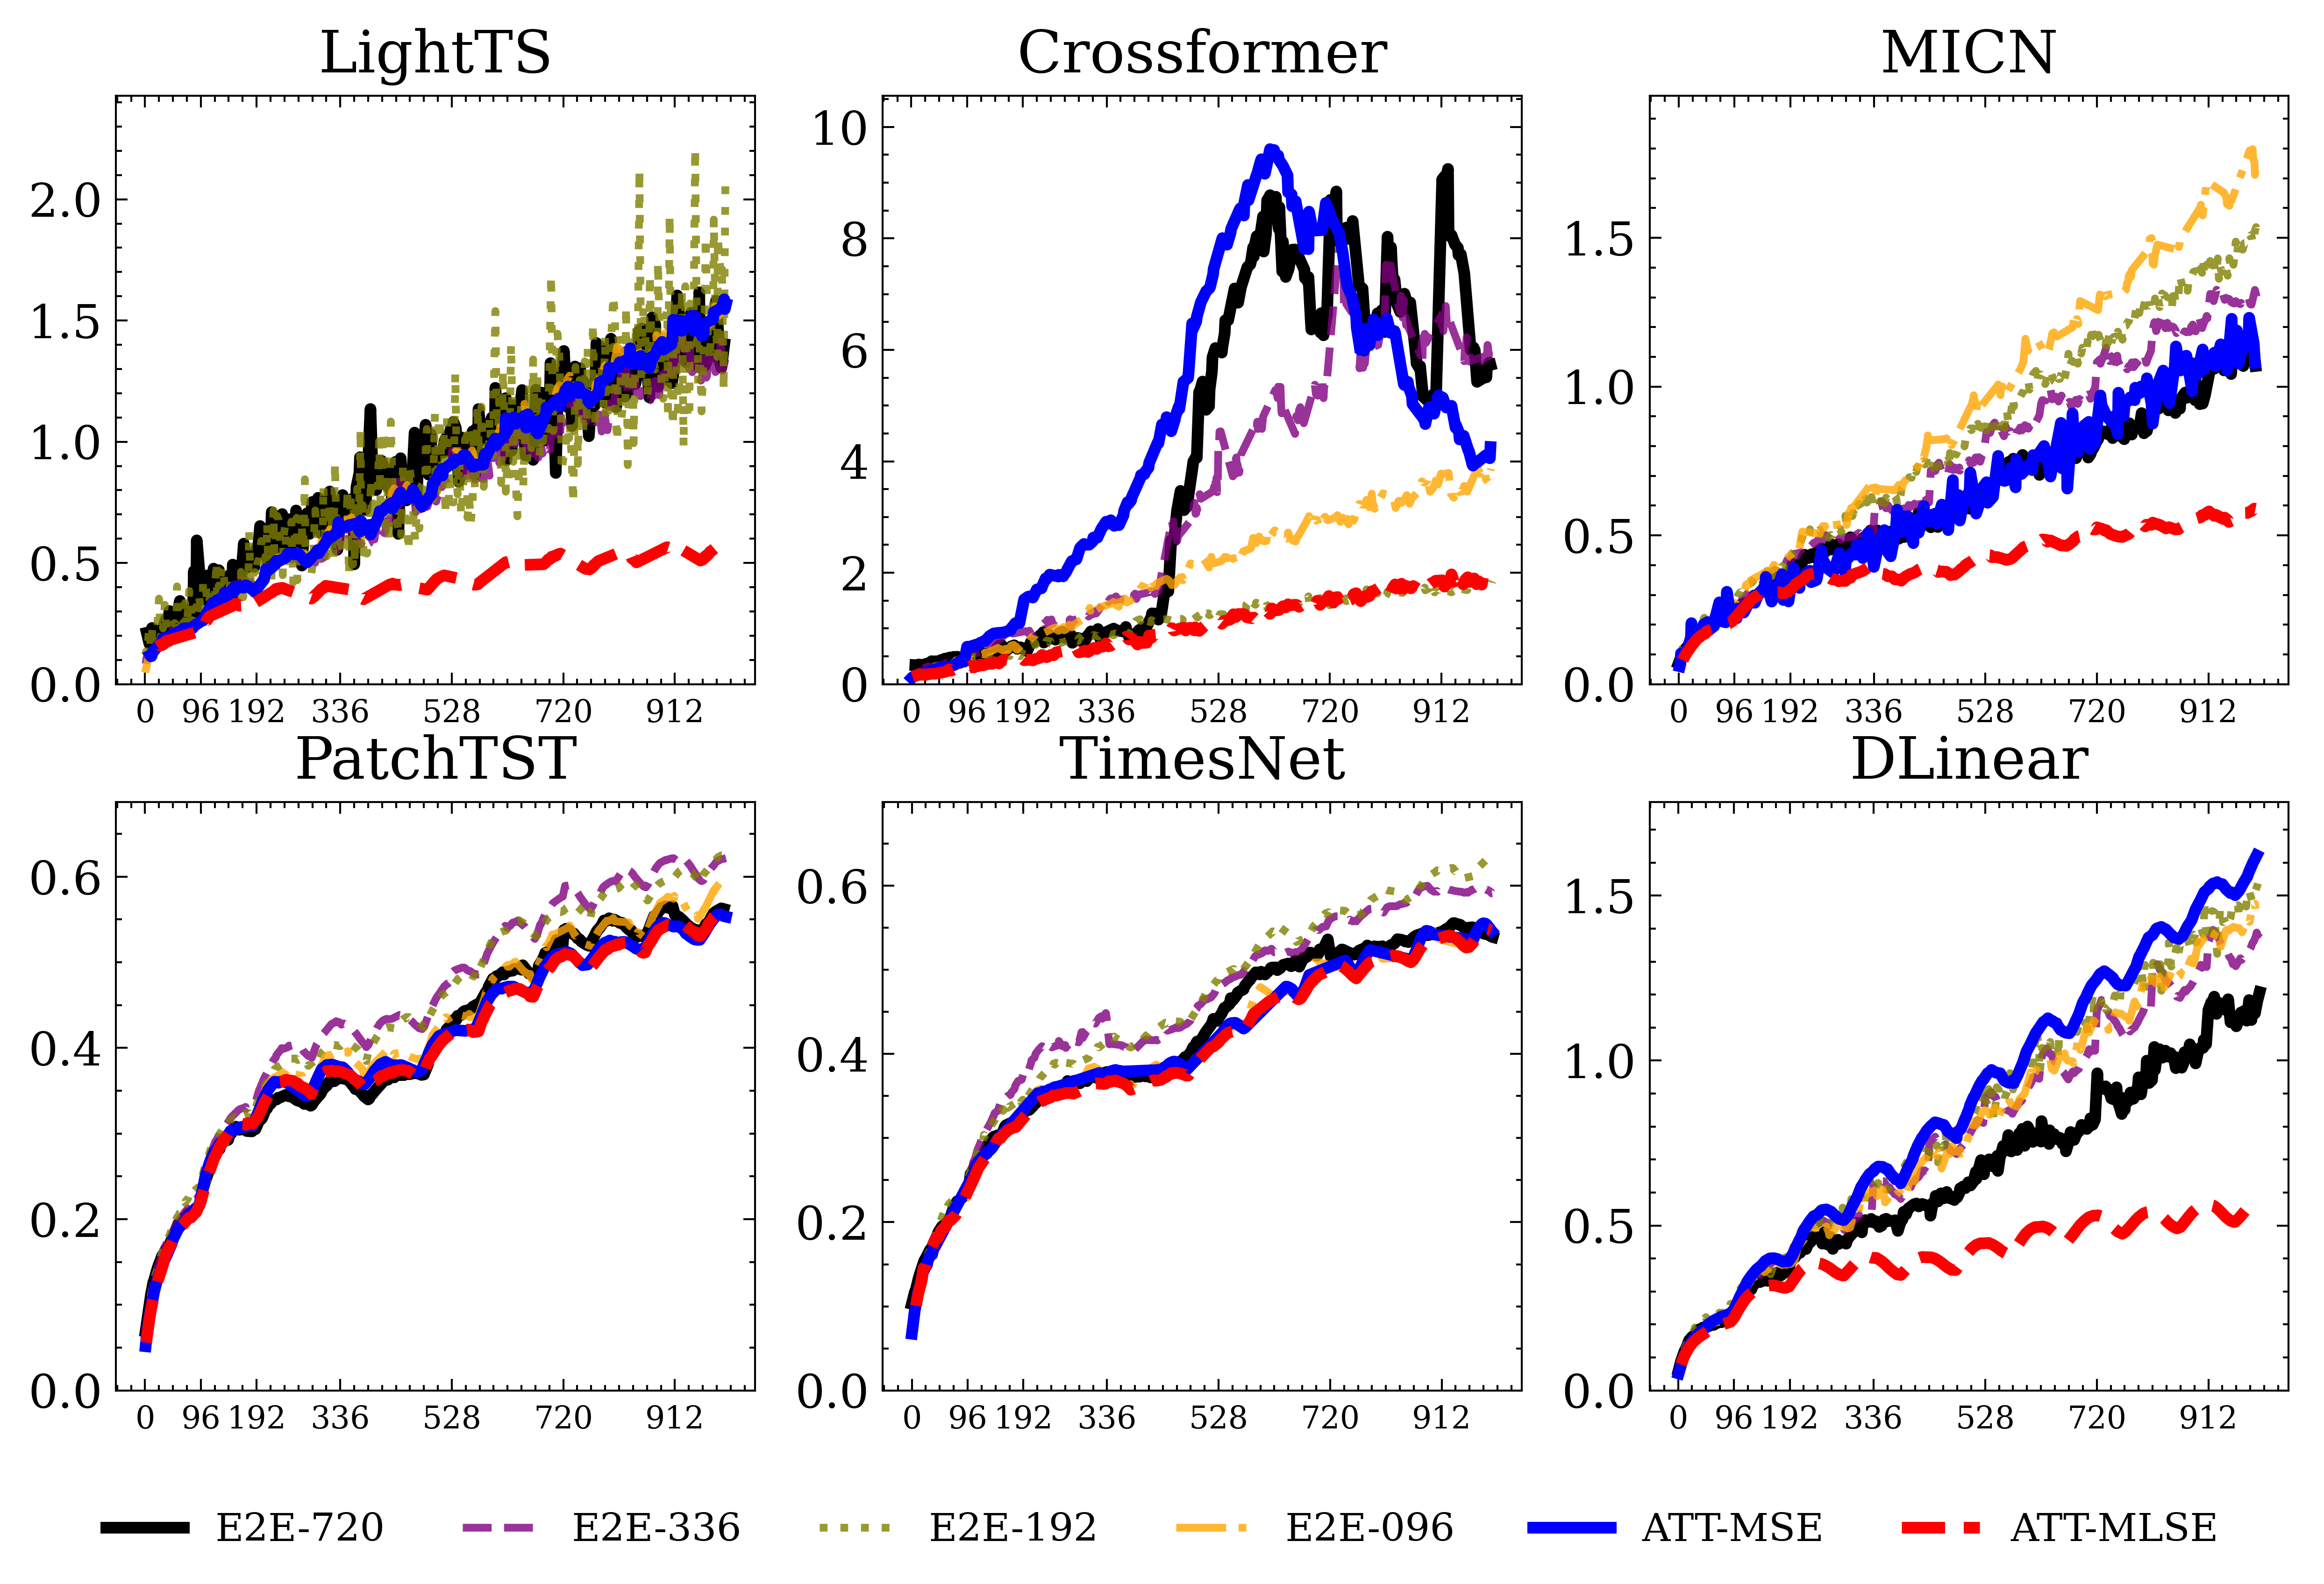

In [91]:
import scienceplots
with plt.style.context(['science', 'no-latex', 'ieee']):
    fig,axes = plt.subplots(2,3,figsize=(10,6))
    axes = axes.flatten()
    for i,(model, data) in enumerate(pool.items()):
        estimate_the_long_term_error(data,axes[i],show_label = (i==len(axes)-1))
    for ax in axes:
        max_y = max([line.get_data()[1].max() for line in ax.lines])
        ax.set_ylim([0,1.1*max_y])
        print(max_y)
    fig.legend(loc='lower center', ncol=6,prop={'size': 10})
fig.savefig("figures/estimate_the_long_term_error_for_ETTm2.png", dpi=300)

1.9060131311416624